## Delay SIR Takeuchi

In [1]:
using DifferentialEquations
using QuadGK
using Plots
using Measures
gr()

Plots.GRBackend()

In [2]:

const r = 10.0
const r = 1.0
const r = 1.0
const tau = 1.0

# Define the nonlinear function





1.0

In [3]:
function distdde(du,u,h,p,t)
  du[1] = 0.5-p[1]*u[1]-p[2]*u[1]*h(p, t-p[4])[2]
  du[2] = p[2]*u[1]*h(p, t-p[4])[2]-(p[1]+p[3])*u[2]
end

p=[0.1,0.1,0.49,30.0]

lags = [p[4]]

1-element Array{Float64,1}:
 30.0

In [4]:
#######
#GIVE THE INITIAL FUNCTION HERE FOR x(t)
#######
# Initial function for x component
init11(x)=0.1*x+3.0
init12(x)=1.1-cos(0.05*pi*x)

init21(x)=0.1*x+3.0
init22(x)=2.0-sin(x)


init22 (generic function with 1 method)

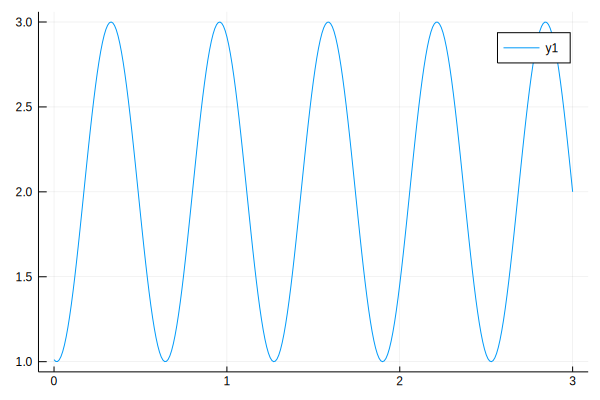

In [5]:
plot(init11,-1,0,label="initial x",    linewidth=4)
plot!(init12,-1,0,label="initial y",linewidth=4)

init11f = [init11(-0.1*n) for n in 0:300]
init12f = [init12(-0.1*n) for n in 0:300]
init21f = [init21(-0.1*n) for n in 0:300]
init22f = [init22(-0.1*n) for n in 0:300]

plot(init21f,init22f)

In [6]:
h1(p, t) = [init11(t),init12(t)]
u10 = [init11(0),init12(0)]
h2(p, t) = [init21(t),init22(t)]
u20 = [init21(0),init22(0)]

2-element Array{Float64,1}:
 3.0
 2.0

In [7]:
tspan = (0.0,5000.0)
prob1 = DDEProblem(distdde,u10,h1,tspan,p; constant_lags=lags)
prob2 = DDEProblem(distdde,u20,h2,tspan,p; constant_lags=lags)

DDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 5000.0)
u0: [3.0, 2.0]

In [8]:
alg = MethodOfSteps(Tsit5())
alg = MethodOfSteps(Vern6())


MethodOfSteps{Vern6,NLFunctional{Rational{Int64},Rational{Int64}},false}(Vern6(true), NLFunctional{Rational{Int64},Rational{Int64}}(1//100, 1//5, 10))

In [9]:
sol1 = solve(prob1,alg,reltol=1e-6);
sol2 = solve(prob2,alg,reltol=1e-6)

retcode: Success
Interpolation: specialized 6th order lazy interpolation
t: 1838-element Array{Float64,1}:
    0.0                 
    0.060330681037137096
    0.28612130808501424 
    0.6005761682118371  
    0.9123458484520006  
    1.2578706127374288  
    1.6105167460101535  
    1.981674180563972   
    2.3698862137652084  
    2.7932954555039387  
    3.344025998837589   
    3.7855328449156067  
    4.286445927596418   
    ⋮                   
 4967.4129898825195     
 4970.765446078184      
 4973.834200425535      
 4977.111167924976      
 4980.01945695665       
 4983.421671398304      
 4986.4681857982305     
 4989.229772361336      
 4993.296590586889      
 4996.148969316333      
 4999.708943113863      
 5000.0                 
u: 1838-element Array{Array{Float64,1},1}:
 [3.0, 2.0]        
 [2.99386, 1.94796]
 [2.9719, 1.7682]  
 [2.93903, 1.55756]
 [2.89664, 1.39404]
 [2.83128, 1.26316]
 [2.74084, 1.17839]
 [2.62087, 1.13208]
 [2.47544, 1.11569]
 [2.30761, 1.11545]


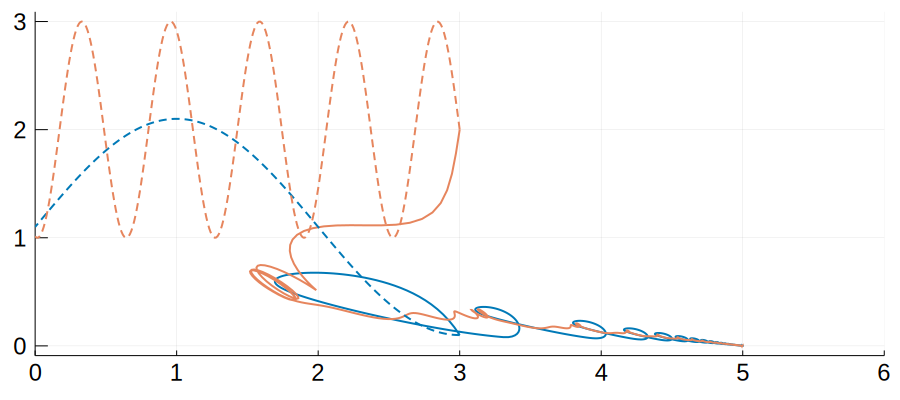

In [10]:

theme(:default)
plot(sol1,
    vars=(1,2),
    linewidth=2,
    color="#0079B7",
    label="",
    xtickfont = font(16),
xlim=(0,5),
    ytickfont = font(16),
    size=(800,400),
    bottom_margin=3mm,
    right_margin=2mm,
#    background_color="#e6e6fa"
    ) # legend=false
plot!(sol2,
    vars=(1,2),
    linewidth=2,
    color="#E6855D",
    label="",
    xtickfont = font(16),
xlim=(0,6),
    ytickfont = font(16),
    size=(900,400),
    bottom_margin=3mm,
    right_margin=2mm)
plot!(init11f,init12f,
    color="#0079B7",
        linewidth=2,
linestyle=:dash,
label="")

plot!(init21f,init22f,
    color="#E6855D",
        linewidth=2,
linestyle=:dash,
label="")
#plot!(init_x,-1,0,
#    linewidth=4,
#    color="#FF9900",label="x init")


In [11]:
savefig("SIRDelay.pdf")

In [12]:
### Let us compute the corresponding ODE 


In [13]:
anim=@animate for i=0:70

plot(sol1,
    vars=(1,2),
    linewidth=2,
    color="#0079B7",
    label="",
    xtickfont = font(16),
xlim=(0,5),
    ytickfont = font(16),
    size=(800,400),
    bottom_margin=3mm,
    right_margin=2mm,
#    background_color="#e6e6fa"
    ) # legend=false
plot!((sol1(0.5*i*0.5*i)[1],sol1(0.5*i*0.5*i)[2]), 
        marker = :circle,
        markersize = 6,
        label="",
        markercolor = "#0079B7")
    
plot!(sol2,
    vars=(1,2),
    linewidth=2,
    color="#E6855D",
    label="",
    xtickfont = font(16),
xlim=(0,6),
    ytickfont = font(16),
    size=(900,400),
    bottom_margin=3mm,
    right_margin=2mm,)
plot!((sol2(0.5*0.5*i*i)[1],sol2(0.5*0.5*i*i)[2]), 
        marker = :circle,
        markersize = 6,
        label="",
        markercolor = "#E6855D")
    
plot!(init11f,init12f,
    color="#0079B7",
        linewidth=2,
linestyle=:dash,
label="")

plot!(init21f,init22f,
    color="#E6855D",
        linewidth=2,
linestyle=:dash,
label="")
end
gif(anim, "anim_EE_Takeuchi.gif", fps = 8)

┌ Info: Saved animation to 
│   fn = /Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_EE_Takeuchi.gif
└ @ Plots /Users/ynakata/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/ynakata/Box Sync/Program/Julia_MacbookPro/ScalarDDE/anim_EE_Takeuchi.gif")